


Epoch 1/10


88/88 [==============================] - 15s 98ms/step - loss: 1.0409 - accuracy: 0.5726 - val_loss: 0.5008 - val_accuracy: 0.8080
Epoch 2/10
88/88 [==============================] - 7s 82ms/step - loss: 0.4394 - accuracy: 0.8152 - val_loss: 0.3696 - val_accuracy: 0.8393
Epoch 3/10
88/88 [==============================] - 7s 80ms/step - loss: 0.3445 - accuracy: 0.8554 - val_loss: 0.3942 - val_accuracy: 0.8336
Epoch 4/10
88/88 [==============================] - 7s 80ms/step - loss: 0.2933 - accuracy: 0.8725 - val_loss: 0.2922 - val_accuracy: 0.8734
Epoch 5/10
88/88 [==============================] - 7s 79ms/step - loss: 0.2665 - accuracy: 0.8892 - val_loss: 0.3185 - val_accuracy: 0.8748
Epoch 6/10
88/88 [==============================] - 7s 79ms/step - loss: 0.2465 - accuracy: 0.8960 - val_loss: 0.3230 - val_accuracy: 0.8649
Epoch 7/10
88/88 [==============================] - 7s 81ms/step - loss: 0.2318 - accuracy: 0.9046 - val_loss: 0.3244 - val_accuracy: 0.8492
Epoch 8

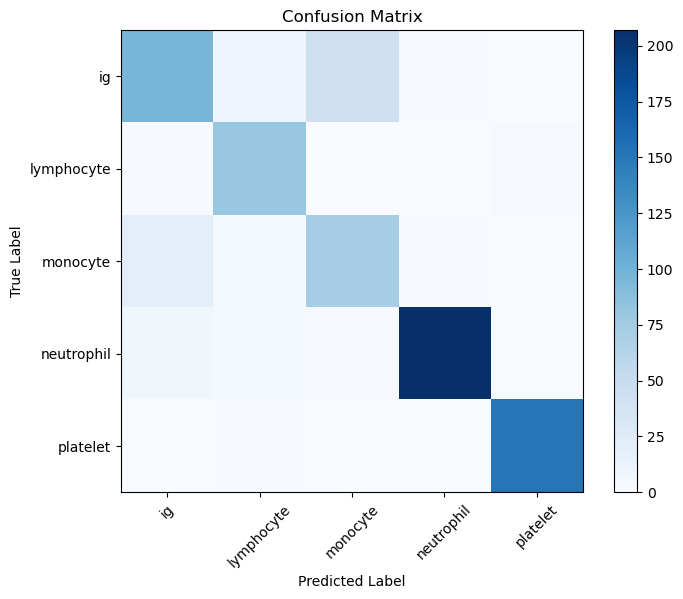

c:\Users\usmar\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [2]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Set the path to your dataset folders
folders = ['ig', 'lymphocyte', 'monocyte', 'neutrophil', 'platelet']
data = []
labels = []

# Read images from each folder
for label, folder in enumerate(folders):
    folder_path = os.path.join(folder)
    images = os.listdir(folder_path)
    
    # Select 35% of the data
    num_images = int(len(images) * 0.35)
    selected_images = np.random.choice(images, num_images, replace=False)
    
    for image_name in selected_images:
        image_path = os.path.join(folder_path, image_name)
        img = tf.keras.preprocessing.image.load_img(image_path, target_size=(64, 64))
        img_array = tf.keras.preprocessing.image.img_to_array(img)
        data.append(img_array)
        labels.append(label)

# Convert lists to numpy arrays
data = np.array(data)
labels = np.array(labels)

# Normalize the data
data = data / 255.0

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Create a simple CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(len(folders), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

# Generate predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Print classification report and confusion matrix
print(classification_report(y_test, y_pred_classes))
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks(np.arange(len(folders)), folders, rotation=45)
plt.yticks(np.arange(len(folders)), folders)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Save the model
model.save('image_classification_model.h5')


In [2]:
pip install tensorflow

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'D:\\SEMESTER 5\\anaconda\\Lib\\site-packages\\~=mpy\\.libs\\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll'
Consider using the `--user` option or check the permissions.



  Using cached numpy-1.26.4-cp39-cp39-win_amd64.whl (15.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
